In [5]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV, learning_curve
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, f1_score, classification_report, roc_auc_score, confusion_matrix, 
ConfusionMatrixDisplay, roc_curve, make_scorer)


from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced 

from lazypredict.Supervised import LazyClassifier
import xgboost as xgb
from skopt import BayesSearchCV

from joblib import dump, load
import cloudpickle

import time


base_path = "Dataset_preprocesse/"

X_train=pd.read_csv(base_path + 'X_train_scaled.csv', index_col=0)
X_test=pd.read_csv(base_path + "X_test_scaled.csv", index_col=0) 

y_train=pd.read_csv(base_path + "y_train.csv", usecols=["RainTomorrow"]) 
y_test=pd.read_csv(base_path + "y_test.csv", usecols=["RainTomorrow"]) 

display(X_train.head(2)) 
display(X_train.info())
display(X_test.head(2)) 
display(X_test.info())

display(y_train.head(2)) 
display(y_train.info())
display(y_test.head(2)) 
display(y_test.info())

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,...,WindDir3pm_sin,WindDir3pm_cos,WindGustDir_sin,WindGustDir_cos,month_sin,month_cos,Amplitude_Temp,Year_delta,Latitude_delta,Longitude_delta
62102,1.63,0.12,0.46,0.45,0.88,0.79,-1.37,-1.51,7.00,7.00,...,-0.92,-0.38,-1.00,-0.00,-0.50,-0.87,-0.28,4.00,-0.70,0.18
109242,0.00,0.64,-0.31,1.09,0.70,0.69,0.41,0.54,6.00,5.00,...,-0.92,-0.38,-0.72,-0.27,-1.00,-0.00,-0.63,3.00,-0.15,-2.42


<class 'pandas.core.frame.DataFrame'>
Index: 104329 entries, 62102 to 47560
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Rainfall             104329 non-null  float64
 1   WindGustSpeed        104329 non-null  float64
 2   WindSpeed9am         104329 non-null  float64
 3   WindSpeed3pm         104329 non-null  float64
 4   Humidity9am          104329 non-null  float64
 5   Humidity3pm          104329 non-null  float64
 6   Pressure9am          104329 non-null  float64
 7   Pressure3pm          104329 non-null  float64
 8   Cloud9am             104329 non-null  float64
 9   Cloud3pm             104329 non-null  float64
 10  Temp9am              104329 non-null  float64
 11  Temp3pm              104329 non-null  float64
 12  NoWind_WindSpeed9am  104329 non-null  float64
 13  WindDir9am_sin       104329 non-null  float64
 14  WindDir9am_cos       104329 non-null  float64
 15  NoWind_WindSpeed3pm

None

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,...,WindDir3pm_sin,WindDir3pm_cos,WindGustDir_sin,WindGustDir_cos,month_sin,month_cos,Amplitude_Temp,Year_delta,Latitude_delta,Longitude_delta
2584,0.00,-0.65,-0.85,-0.91,0.75,0.31,0.07,0.04,1.00,2.00,...,-0.38,0.92,0.71,0.71,0.87,0.50,1.30,9.00,-0.34,0.16
33673,3.62,-0.65,-0.31,0.09,0.95,0.87,1.14,0.96,8.00,8.00,...,0.92,0.38,0.92,0.38,0.50,-0.87,-1.38,2.00,0.04,0.54


<class 'pandas.core.frame.DataFrame'>
Index: 26083 entries, 2584 to 96354
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rainfall             26083 non-null  float64
 1   WindGustSpeed        26083 non-null  float64
 2   WindSpeed9am         26083 non-null  float64
 3   WindSpeed3pm         26083 non-null  float64
 4   Humidity9am          26083 non-null  float64
 5   Humidity3pm          26083 non-null  float64
 6   Pressure9am          26083 non-null  float64
 7   Pressure3pm          26083 non-null  float64
 8   Cloud9am             26083 non-null  float64
 9   Cloud3pm             26083 non-null  float64
 10  Temp9am              26083 non-null  float64
 11  Temp3pm              26083 non-null  float64
 12  NoWind_WindSpeed9am  26083 non-null  float64
 13  WindDir9am_sin       26083 non-null  float64
 14  WindDir9am_cos       26083 non-null  float64
 15  NoWind_WindSpeed3pm  26083 non-null  f

None

,RainTomorrow
0,1
1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104329 entries, 0 to 104328
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   RainTomorrow  104329 non-null  int64
dtypes: int64(1)
memory usage: 815.2 KB


None

,RainTomorrow
0,0
1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   RainTomorrow  26083 non-null  int64
dtypes: int64(1)
memory usage: 203.9 KB


None

In [6]:
stop

NameError: name 'stop' is not defined

### LazyClassifier et proposition de pipeline

In [7]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 23408, number of negative: 80921
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4302
[LightGBM] [Info] Number of data points in the train set: 104329, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224367 -> initscore=-1.240396
[LightGBM] [Info] Start training from score -1.240396


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.76,0.76,0.76,0.78,0.35
XGBClassifier,0.86,0.76,0.76,0.86,1.21
LGBMClassifier,0.86,0.75,0.75,0.85,1.68
GaussianNB,0.80,0.75,0.75,0.80,0.34
QuadraticDiscriminantAnalysis,0.83,0.75,0.75,0.83,0.61
RandomForestClassifier,0.86,0.74,0.74,0.85,36.36
BernoulliNB,0.78,0.74,0.74,0.79,0.27
SVC,0.86,0.74,0.74,0.85,770.84
ExtraTreesClassifier,0.86,0.74,0.74,0.85,28.69


Présentation du pipeline : 
-> RandomizedSearchCV (car le LazyClassifier tourne sur des paramètres par défaut) sur Régression Logisitque, RandomForestClassifier, DecisionTree Classifier, KNeighborsClassifier, xgb
_ On ne prend pas SVC qui est trop chronophage
-> Sur les 3 meilleurs modèles : 
_ identifier les meilleurs hyperparamètres et vérifier qu'il n'y a pas de surapprentissage
_ si biais> Variance : 
        _ enrichir les features
        _ identifier les meilleurs hyperparamètres, optimiser le seuil, et évaluer
_ identifier les meilleurs hyperparamètres, optimiser le seuil, et évaluer
_ Comparer entre les deux jeux de données les performances selon les features (si nécessaire nouvelle itéreation et remodifier les features)

In [8]:
# Optimisation d'hyperparam par random search
models = {"clf_lr" : [LogisticRegression(),
                      {'C': [0.01, 0.1, 1,10, 100], 'solver': ["liblinear","newton-cholesky"], "class_weight":['balanced', None]}],
          "clf_rf" : [RandomForestClassifier(),
                      {"max_depth": list(range(5, 20, 5)), "min_samples_split":  [10, 50, 100, 200], "min_samples_leaf": [10, 50, 100], "class_weight":['balanced', None], "random_state":[0]}],
          "clf_dt" : [DecisionTreeClassifier(),
                      {"max_depth": list(range(5, 20, 5)), "min_samples_split": [10, 50, 100, 200], "min_samples_leaf": [10, 50, 100], "class_weight":['balanced', None], "random_state":[0]}],
          "clf_knn" : [KNeighborsClassifier(),
                       {'n_neighbors': [3,5,7,9]}],
        "clf_xgb" : [xgb.XGBClassifier(),
                       {"n_jobs":[-2]}]} #tester qq params

def compare_search_methods (model_name, model, param_grid, X_train, X_test, y_train, y_test):
    results = {}
    random_cv = RandomizedSearchCV(estimator = model, param_distributions = param_grid,
                                              n_iter = 5, random_state = 42, cv=skf, n_jobs = -2, scoring = "f1")
    random_cv.fit(X_train, y_train) #Suite à l’entrainement, la meilleure combinaison et son score ont été trouvé
    results["random_search"] = [model_name, random_cv.best_params_, 
                        np.round(random_cv.cv_results_["mean_test_score"],3), 
                        np.round(random_cv.best_score_,3)]
    y_pred = random_cv.predict(X_test) #sera lancé sur le meilleur param
    accuracy = np.round(accuracy_score(y_test, y_pred),3) # comme bcp de metrics besoin prévision sur data jamais vues pour évaluer
    results["random_search"].append(accuracy)
    print(model_name)
    print(classification_report(y_test, y_pred))
    print(classification_report_imbalanced(y_test, y_pred))
    return results

skf = StratifiedKFold(n_splits=5, random_state=111, shuffle=True) 

for classifier_name, detail_classifier in models.items() :
    results = compare_search_methods (classifier_name, detail_classifier[0], detail_classifier[1], X_train, X_test, y_train, y_test)
    print("estimateur:{Best params}, scores_f_fold, best_score_f1, Accuracy")
    print(results)

clf_lr
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     20231
           1       0.53      0.78      0.63      5852

    accuracy                           0.80     26083
   macro avg       0.73      0.79      0.75     26083
weighted avg       0.84      0.80      0.81     26083

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.80      0.78      0.86      0.79      0.63     20231
          1       0.53      0.78      0.80      0.63      0.79      0.63      5852

avg / total       0.84      0.80      0.79      0.81      0.79      0.63     26083

estimateur:{Best params}, scores_f_fold, best_score_f1, Accuracy
{'random_search': ['clf_lr', {'solver': 'newton-cholesky', 'class_weight': 'balanced', 'C': 100}, array([0.623, 0.629, 0.607, 0.626, 0.629]), np.float64(0.629), np.float64(0.796)]}
clf_rf
              precision    recall  f1-score   support

           0       0.93

LR : Très rapide, metrics moyen, très interprétable
KNN : Durée assez longue, et metrics moins bons
RF : Un peu lourd, bon metrics, pourrait être un bon compromis
DF : Assez rapide, mais moins bon qu'une régression logistique. 
xgb : rapide, bon metrics, mais peu interprétable

### Liste Fonctions

In [10]:
# FONCTION Optimisation Bayesienne sur une grille : trouve le meilleur hyperparamètre + learning curve pour vérifier l'overfitting

def compare_search_methods(
    model_name: str,
    estimator,
    param_grid: dict,
    X_train,
    X_test,
    y_train,
    y_test,
    cv_splits: int = 5,
    bayes_iter: int = 30,
    scoring: str = 'f1',
    random_state: int = 42,
    n_jobs: int = -1,
    fit_kwargs: dict = None  
):
    """
    Compare parameter search methods (Bayesian) for a given estimator,
    print reports, and plot the learning curve.
    """
    # Cross-validation strategy
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)

    # Bayesian search
    bayes = BayesSearchCV(
        estimator=estimator,
        search_spaces=param_grid,
        n_iter=bayes_iter,
        scoring=scoring,
        cv=cv,
        random_state=random_state,
        n_jobs=n_jobs,
    )
    if fit_kwargs is None:
        bayes.fit(X_train, y_train)
    else:
        bayes.fit(X_train, y_train, **fit_kwargs)

    # Collect results
    results = {
        'model': model_name,
        'best_params': bayes.best_params_,
        'mean_test_score_std': np.std(bayes.cv_results_['mean_test_score']),
        'best_score': np.round(bayes.best_score_, 3),
    }

    # Evaluate on test set
    y_pred = bayes.predict(X_test)
    accuracy = np.round(accuracy_score(y_test, y_pred), 3)
    results['test_accuracy'] = accuracy

    # Print reports
    print(f"\n=== {model_name} ===")
    print("Best parameters:", bayes.best_params_)
    print("Test accuracy:", accuracy)
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))
    print("\nImbalanced report:")
    print(classification_report_imbalanced(y_test, y_pred))

    # Plot learning curve
    clf_best = estimator.set_params(**bayes.best_params_)
    # Recrée le meilleur modèle sans early stopping
    if hasattr(clf_best, 'early_stopping_rounds'):
        clf_best.set_params(early_stopping_rounds=None)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=clf_best,
        X=X_train,
        y=y_train,
        cv=cv,
        scoring=make_scorer(f1_score, average='binary'),
        train_sizes=np.linspace(0.1, 1.0, 10), #il n'y a plus de stratify comme dans train_test_split
        n_jobs=n_jobs,
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.plot(train_sizes, train_mean, 'o-', label='Training score (F1)')
    plt.plot(train_sizes, test_mean, 'o-', label='Cross Validation score (F1)')
    plt.xlabel('Training examples')
    plt.ylabel(scoring)
    plt.title(f'Learning Curve ({model_name})')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Extraire les 3 meilleures combinaisons de paramètres
    top3_idx = np.argsort(bayes.cv_results_['mean_test_score'])[::-1][:3]
    top3_params = [
        {
            'rank': i + 1,
            'params': bayes.cv_results_['params'][idx],
            'mean_test_score': bayes.cv_results_['mean_test_score'][idx]
        }
        for i, idx in enumerate(top3_idx)
    ]
    results['top3_params'] = top3_params
    print("\nTop 3 parameter sets (with mean test scores):")
    for entry in top3_params:
        print(f"  Rank {entry['rank']}: params = {entry['params']}, mean_test_score = {entry['mean_test_score']:.3f}")

    
    return results, bayes.best_estimator_

In [11]:
#FONCTION POUR FEATURES ANALYSIS AND SELECTION

from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


def compute_correlations(X: pd.DataFrame, y: pd.Series) -> pd.Series:
    """
    Compute Pearson correlation between each feature in X and the target y.
    Returns a Series indexed by feature names.
    """
    corr = X.corrwith(y)
    print("Correlation Person")
    return corr.sort_values(key=lambda x: np.abs(x), ascending=False)


def compute_vif(X: pd.DataFrame) -> pd.DataFrame:
    """
    Compute Variance Inflation Factor (VIF) for each feature in X.
    Returns a DataFrame with features and their VIF.
    """
    # Add constant for statsmodels
    X_const = sm.add_constant(X)
    vif_data = []
    for i, feature in enumerate(X.columns):
        vif = variance_inflation_factor(X_const.values, i+1)  # +1 to skip constant
        vif_data.append({'feature': feature, 'VIF': vif})
    print("VIF _ VIF > 30 → colinéarité critique // VIF Inf : supprimer une des 2 paires")
    return pd.DataFrame(vif_data).sort_values('VIF', ascending=False)


def compute_permutation_importance(model, X: pd.DataFrame, y: pd.Series, scoring='f1', n_repeats=10, random_state=42) -> pd.DataFrame:
    """
    Compute permutation importance for a fitted model.
    Returns a DataFrame sorted by mean importance.
    """
    result = permutation_importance(
        model, X, y,
        scoring=scoring,
        n_repeats=n_repeats,
        random_state=random_state,
        n_jobs=-1
    )
    imp_df = pd.DataFrame({
        'feature': X.columns,
        'importance_mean': result.importances_mean,
        'importance_std': result.importances_std
    })
    print("Permutation importance _ 0 possibilité de supprimer ou transformer")
    return imp_df.sort_values('importance_mean', ascending=False)


def select_features_by_l1(model, X: pd.DataFrame, y: pd.Series, threshold='median') -> list:
    """
    Use L1-penalized linear model to select features. Returns list of selected feature names.
    """
    selector = SelectFromModel(
        estimator=model,
        threshold=threshold,
        prefit=False
    )
    selector.fit(X, y)
    selected = X.columns[selector.get_support()].tolist()
    return selected

def plot_mutual_info(X, y, title, ax=None):
    """Trace un graphique de l'information mutuelle entre chaque feature et la cible."""
    importances = mutual_info_classif(X, y)
    mi_series = pd.Series(importances, index=X.columns)
    mi_sorted = mi_series.sort_values(ascending=True)

    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 8))
    
    mi_sorted.plot.barh(ax=ax)
    ax.set_xlabel("Mutual Information")
    ax.set_title(title)
    

def Feature_analysis_selection(model_fitted_sur_enrichi, X_train, X_train_enrichi, X_test, X_test_enrichi, y_train, y_test) : 
    # 1. Corrélations
    corr_series = compute_correlations(X_train_enrichi, y_train)
    print(corr_series.head(20))

    # 2. VIF
    vif_df = compute_vif(X_train_enrichi)
    print(vif_df)

    # 4. Permutation importance
    perm_imp_df = compute_permutation_importance(model_fitted_sur_enrichi, X_test_enrichi, y_test)
    print(perm_imp_df.head(20))

    # 5. Sélection L1 (pour modèles linéaires) #utile? est-ce qu'on peut ajouter la pénalité au modele deja fitted?
    model_l1 = LogisticRegression(penalty='l1', solver='saga', C=1.0)
    selected_feats = select_features_by_l1(model_l1, X_train_enrichi, y_train)
    print(selected_feats)

    # 6. Affichage de l'information mutuelle des datasets 
    fig, axes = plt.subplots(1, 2, figsize=(6, 6))
    plot_mutual_info(X_train, y_train, "Mutual Info", ax=axes[0])
    plot_mutual_info(X_train_enrichi, y_train, "Mutual Info (Après enrichissement)", ax=axes[1])
    fig.suptitle("Information mutuelle (pour relations linéaires et non linéaires)", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # 6. Réentraînement sur features sélectionnées #utile??
    X_train_sel = X_train_enrichi[selected_feats]
    X_val_sel = X_test_enrichi[selected_feats]
    model_final = model.__class__()
    model_final.set_params(**model.get_params())
    model_final.fit(X_train_sel, y_train)


In [12]:
# FONCTION Optimisation Bayesienne + identification du seuil de classification optimal + metrics
def optimize_model(model_name, estimator, param_grid, X_train, X_test, y_train, y_test, nom_type_dataset,
                   cv_splits=10, bayes_iter=30, scoring='f1', optimize_threshold=True,
                   random_state=42, n_jobs=-1,):

    print(f"Optimisation : {model_name}")
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)

    bayes = BayesSearchCV(estimator, param_grid, n_iter=bayes_iter, scoring=scoring,
                          cv=cv, random_state=random_state, n_jobs=n_jobs)
    bayes.fit(X_train, y_train)

    best_params = bayes.best_params_
    best_model = estimator.set_params(**best_params)
    best_model.fit(X_train, y_train)

    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Optimisation du seuil de classification
    if optimize_threshold:
        thresholds = np.linspace(0.1, 0.9, 81)
        f1_scores = [f1_score(y_test, y_proba >= t) for t in thresholds]
        best_threshold = thresholds[np.argmax(f1_scores)]
    else:
        best_threshold = 0.5

    y_pred = (y_proba >= best_threshold).astype(int)

    # Sérialisation du modèle et du seuil optimal
    artifact = {
        "model":     best_model,
        "threshold": best_threshold
    }
   
    filename = "models/{}_{}_model_and_threshold.joblib".format(model_name, nom_type_dataset)
    dump(artifact, filename)
    print(f"Modèle + seuil sauvegardés dans : {filename}")

    # Evaluation
    acc, f1 = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

    print(f"\n{model_name} | F1: {f1:.3f} | Acc: {acc:.3f} | Seuil: {best_threshold:.2f}")
    print("Meilleurs hyperparamètres:", best_params)
    print("Classification report:\n", classification_report(y_test, y_pred))
    print("Rapport déséquilibre:\n", classification_report_imbalanced(y_test, y_pred))
    
    ## Création de la figure avec deux sous-graphiques côte à côte
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Calcul de metrics à afficher sur le graphique
    f1_positive = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_proba)

    ## Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[0], cmap="Blues", values_format="d", colorbar=False)
    axes[0].set_title("Matrice de Confusion")
        
    ## Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", color="darkorange")
    axes[1].plot([0, 1], [0, 1], linestyle='--', color="gray")
    axes[1].set_xlabel("Taux de faux positifs")
    axes[1].set_ylabel("Taux de vrais positifs")
    axes[1].set_title("Courbe ROC")
    axes[1].legend()
    axes[1].grid(True)

    # Titre principal et sous-titre
    fig.suptitle(f"Évaluation du modèle : {model_name}", fontsize=14)
    fig.text(
        0.5,         # x (milieu de la figure)
        0.88,        # y (juste sous le suptitle)
        f"F1-score (classe positive) : {f1_positive:.3f}",
        ha='center', # alignement horizontal centré
        fontsize=12
    )
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return {
        "model_name": model_name,
        "best_params": best_params,
        "best_model": best_model,
        "best_threshold": best_threshold,
        "f1_score_test": f1,
        "accuracy_test": acc
    }

### Régression logistique : Rapide et interprétable. 
#### F1+ : 0.65 ROC : 0.879 (pas d'impact suppr MinMaxTemp et création de AmplitudeTemp)

#### Undersampling ou param weight_class

La Régression logistique avec un class_weight=balanced offre un bon résultat.
Si on souhaite améliorer la vitesse du modèle, on peut envisager un undersampling de X_train.
| Critère                    | `class_weight='balanced'` | `RandomUnderSampler`                                     |
| -------------------------- | ------------------------- | -------------------------------------------------------- |
| **Simplicité**             | Très simple à activer     | Nécessite Imbalanced‑Learn et pipeline                   |
| **Taille des données**     | Inchangée                 | Réduit potentiellement drastiquement                     |
| **Calibration**            | Peut être dégradée        | Inchangée                                                |
| **Vitesse d’entraînement** | Identique                 | Accélérée si beaucoup de classes majoritaires supprimées |
| **Risque d’overfitting**   | Faible                    | Plus élevé si dataset déjà petit                         |

###### resample = RandomUnderSampler(sampling_strategy='majority') 
###### Sélectionne aléatoirement un sous-ensemble d'échantillons QUE dans la classe majoritaire jusquq'à obtenir le meme nombre d'échantilllons que dans la lcasse minoritaire.
###### X_train_resampling, y_train_resampling = resample.fit_resample(X_train, y_train)


#### Recherche d'hyperparamètres et learning curve


=== clf_lr ===
Best parameters: OrderedDict({'C': 0.10649543303354765, 'class_weight': 'balanced', 'n_jobs': -2, 'random_state': 144, 'solver': 'newton-cholesky'})
Test accuracy: 0.796

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     20231
           1       0.53      0.78      0.63      5852

    accuracy                           0.80     26083
   macro avg       0.73      0.79      0.75     26083
weighted avg       0.84      0.80      0.81     26083


Imbalanced report:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.80      0.78      0.86      0.79      0.63     20231
          1       0.53      0.78      0.80      0.63      0.79      0.63      5852

avg / total       0.84      0.80      0.79      0.81      0.79      0.63     26083



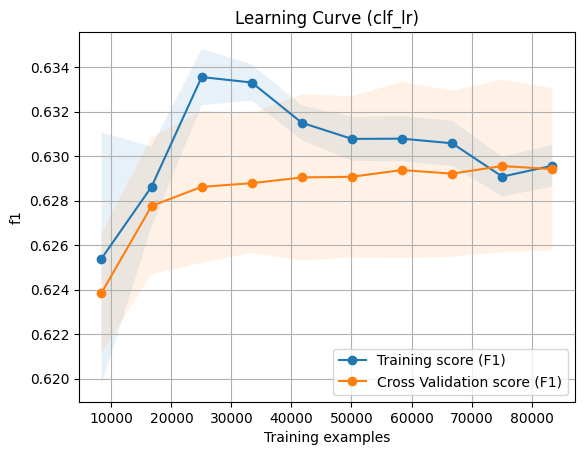


Top 3 parameter sets (with mean test scores):
  Rank 1: params = OrderedDict({'C': 0.10649543303354765, 'class_weight': 'balanced', 'n_jobs': -2, 'random_state': 144, 'solver': 'newton-cholesky'}), mean_test_score = 0.629
  Rank 2: params = OrderedDict({'C': 0.21923369350227212, 'class_weight': 'balanced', 'n_jobs': -2, 'random_state': 144, 'solver': 'liblinear'}), mean_test_score = 0.629
  Rank 3: params = OrderedDict({'C': 0.11790996115202251, 'class_weight': 'balanced', 'n_jobs': -2, 'random_state': 144, 'solver': 'newton-cholesky'}), mean_test_score = 0.629


In [13]:
# Pour la régression logistique, identification des hyperparamètres optimaux avec une méthode bayesienne. 
# Nous utiliserons les deux solvers de classification binaire, et class_weight=balanced pour rééchantilloner les classes
models = {"clf_lr" : [LogisticRegression(),
                          {'C': (0.01, 1000, 'log-uniform'), 'solver': ["liblinear","newton-cholesky"], 
                           "class_weight":["balanced"],'random_state': [144], 'n_jobs': [-2]}]}#solver de classification binaire

results = []
for name, (model, params) in models.items():
     res, clf_best = compare_search_methods(name, model, params, X_train, X_test, y_train, y_test)
     results.append(res)

Il n'y a pas d'overfitting sur le meilleur modèle, mais le biais est supérieur à la variance.
Nous allons enrichir le modèle, en nous basant sur les features que le modèle actuel n'a pas jugé comme important. Nous créerons de nouvelles features non linéaires.

#### Seuil optimisé et évaluation

Seuil optimisé sur dataset normal
Optimisation : LogReg
Modèle + seuil sauvegardés dans : models/LogReg_X_train_normal_model_and_threshold.joblib

LogReg | F1: 0.646 | Acc: 0.834 | Seuil: 0.63
Meilleurs hyperparamètres: OrderedDict({'C': 1.1233621690895232, 'class_weight': 'balanced', 'n_jobs': -2, 'random_state': 144, 'solver': 'newton-cholesky'})
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     20231
           1       0.62      0.67      0.65      5852

    accuracy                           0.83     26083
   macro avg       0.76      0.78      0.77     26083
weighted avg       0.84      0.83      0.84     26083

Rapport déséquilibre:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.88      0.67      0.89      0.77      0.61     20231
          1       0.62      0.67      0.88      0.65      0.77      0.58      5852

avg / total       0.84  

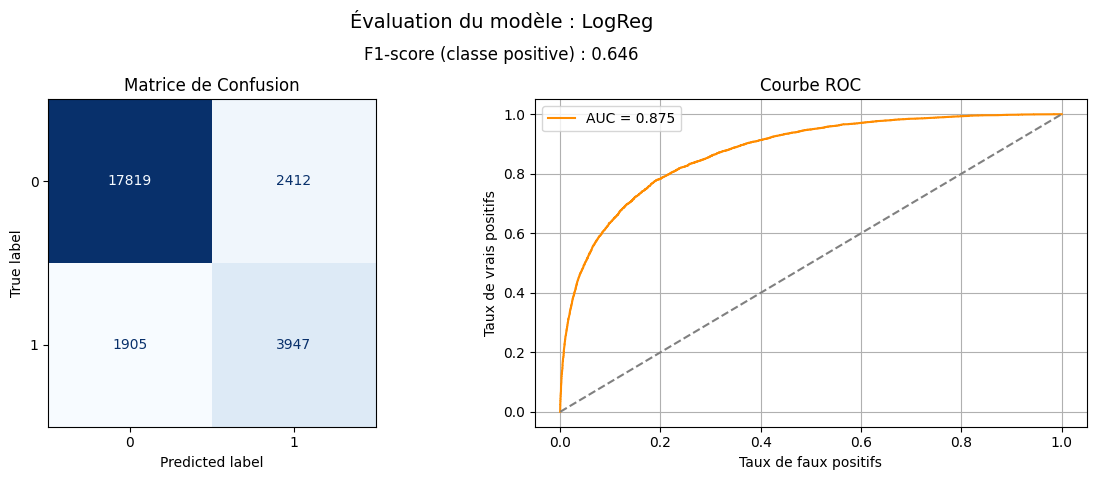

In [14]:
print("Seuil optimisé sur dataset normal")
results = optimize_model(
    model_name='LogReg',
    estimator=LogisticRegression(),
    param_grid={'C': (0.01, 1000, 'log-uniform'), 'solver': ["liblinear","newton-cholesky"], "class_weight":["balanced"],'random_state': [144], 'n_jobs': [-2]},
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    nom_type_dataset = "X_train_normal"
)
best_model_normal = results['best_model']

#### Enrichissement des features

In [15]:
#Features les plus importantes du modèle optimisé précédemment sur dataset actuel
coefs = clf_best.coef_.ravel()
feat_names = X_train.columns

# Construction d’un DataFrame
feat_imp = pd.DataFrame({
    "feature": feat_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs),
    "odds_ratio": np.exp(coefs)
})

# Tri par impact décroissant
feat_imp = feat_imp.sort_values("abs_coef", ascending=False)
print(feat_imp.head(15))

                feature  coef  abs_coef  odds_ratio
5           Humidity3pm  5.09      5.09      161.74
7           Pressure3pm -1.55      1.55        0.21
6           Pressure9am  1.16      1.16        3.19
1         WindGustSpeed  0.96      0.96        2.60
4           Humidity9am  0.49      0.49        1.64
21            month_cos -0.31      0.31        0.73
3          WindSpeed3pm -0.31      0.31        0.73
10              Temp9am  0.25      0.25        1.28
0              Rainfall  0.20      0.20        1.22
9              Cloud3pm  0.18      0.18        1.20
12  NoWind_WindSpeed9am -0.15      0.15        0.86
24       Latitude_delta -0.14      0.14        0.87
2          WindSpeed9am -0.14      0.14        0.87
17       WindDir3pm_cos  0.12      0.12        1.12
14       WindDir9am_cos  0.11      0.11        1.12


In [16]:
# Enrichissement de features : sur la base des features qui n'ont pas été identifiées comme importante par le 1er modèle de Régression Logisitique
def enrichissement_features(X_train):
    X_temp = X_train.copy()

    # 1. Amplitude thermique journalière
    # Usage : mesure la variabilité thermique, un faible delta peut indiquer couverture nuageuse forte.
    # X_temp["Amplitude_Temp"] = X_temp['MaxTemp']-X_temp['MinTemp'] 
    
    # 2. Évolution de la température 9 h → 15 h   #Pas d'amélioration
    # Usage : fort réchauffement diurne peut signaler convection et risque d'orage, qui précède souvent de la pluie.
    # X_temp["delta_temp_9_15"] = X_temp["Temp3pm"] - X_temp["Temp9am"]

    # 3. Température moyenne
    X_temp["Mean_Temp"] = (X_temp["Temp3pm"] - X_temp["Temp9am"])/2

    # 5. Tendance barométrique (9 h → 15 h) #Pas d'amélioration
    # Usage : une chute rapide de pression précède souvent un front pluvieux.
    # X_temp["pressure_trend"] = X_temp["Pressure3pm"] - X_temp["Pressure9am"]

    # 6. Variation d’humidité (9 h → 15 h) #Pas d'amélioration
    # Usage : gain d’humidité diurne peut indiquer évaporation ou advection humide, précurseur de pluie.
    X_temp["humidity_trend"] = X_temp["Humidity3pm"] - X_temp["Humidity9am"]

    # 7. Moyenne de nébulosité #Pas d'amélioration
    # Usage : ciel clair vs couvert, impact direct sur l’activation convective.
    X_temp["cloud_mean"] = (X_temp["Cloud9am"] + X_temp["Cloud3pm"]) / 2

    # 8. Évolution de la couverture nuageuse #Pas d'amélioration
    # Usage : accroissement nuageux de matin à après-midi signale développement de front.
    # X_temp["cloud_delta"] = X_temp["Cloud3pm"] - X_temp["Cloud9am"]

    # 9. Indice de clarté (fraction de ciel découvert)
    # Usage : plus l’indice est élevé, plus le ciel est dégagé.
    X_temp["clearness_index"] = (8 - X_temp["Cloud3pm"]) / 8

    # 10. Gustiness (rafales vs vent soutenu)
    # Usage : un grand écart indique instabilité et cisaillement potentiel.
    X_temp["wind_gustiness"] = X_temp["WindGustSpeed"] - X_temp["WindSpeed3pm"]

    # 11. Composantes vectorielles du vent
    # Usage : permet de capturer la vraie direction/vitesse plutôt que sin/cos seuls.
    X_temp["u_gust"] = X_temp["WindGustSpeed"] * X_temp["WindGustDir_cos"]
    X_temp["v_gust"] = X_temp["WindGustSpeed"] * X_temp["WindGustDir_sin"]
    X_temp["u_9am"] = X_temp["WindSpeed9am"] * X_temp["WindDir9am_cos"]
    X_temp["v_9am"] = X_temp["WindSpeed9am"] * X_temp["WindDir9am_sin"]

    # 12. Angle de saison (mois) en radians
    # Usage : retransforme sin/cos(month) en un angle pour clusteriser saisonnalité.
    X_temp["month_angle"] = np.arctan2(X_temp["month_sin"], X_temp["month_cos"])

    
    X_temp = X_temp.drop(["Temp3pm","Temp9am"],axis=1)
    
    return X_temp

X_train_enrichi = enrichissement_features(X_train)
X_test_enrichi = enrichissement_features(X_test)

X_train_enrichi.head(1)

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,...,Mean_Temp,humidity_trend,cloud_mean,clearness_index,wind_gustiness,u_gust,v_gust,u_9am,v_9am,month_angle
62102,1.63,0.12,0.46,0.45,0.88,0.79,-1.37,-1.51,7.00,7.00,...,-0.04,-0.09,7.00,0.12,-0.34,-0.00,-0.12,0.18,-0.43,-2.62


Seuil optimisé sur dataset enrichi
Optimisation : LogReg
Modèle + seuil sauvegardés dans : models/LogReg_X_train_enrichi_model_and_threshold.joblib

LogReg | F1: 0.649 | Acc: 0.834 | Seuil: 0.62
Meilleurs hyperparamètres: OrderedDict({'C': 2.6527289488018315, 'class_weight': 'balanced', 'n_jobs': -2, 'random_state': 144, 'solver': 'newton-cholesky'})
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89     20231
           1       0.62      0.68      0.65      5852

    accuracy                           0.83     26083
   macro avg       0.76      0.78      0.77     26083
weighted avg       0.84      0.83      0.84     26083

Rapport déséquilibre:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.88      0.68      0.89      0.77      0.61     20231
          1       0.62      0.68      0.88      0.65      0.77      0.59      5852

avg / total       0.84

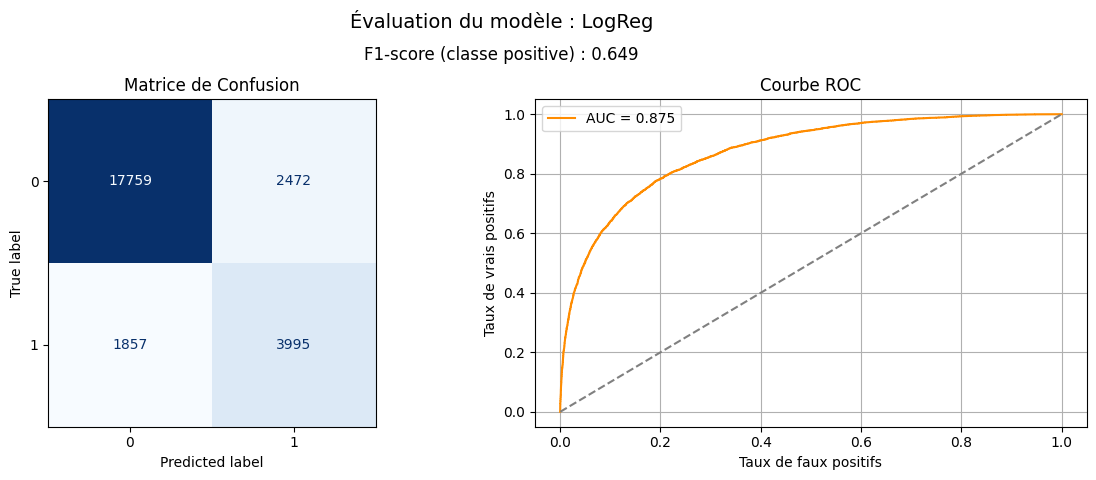

In [17]:
print("Seuil optimisé sur dataset enrichi")
results = optimize_model(
    model_name='LogReg',
    estimator=LogisticRegression(),
    param_grid={'C': (0.01, 1000, 'log-uniform'), 'solver': ["liblinear","newton-cholesky"], "class_weight":["balanced"],'random_state': [144], 'n_jobs': [-2]},
    X_train=X_train_enrichi,
    X_test=X_test_enrichi,
    y_train=y_train,
    y_test=y_test,
    nom_type_dataset = "X_train_enrichi"
)
best_model_enrichi = results['best_model']

##### Analyse des features

In [18]:
#Features les plus importantes pour best model LR sur dataset enrichi
best_model_enrichi.fit(X_train_enrichi, y_train) 
coefs = best_model_enrichi.coef_.ravel()
feat_names = X_train_enrichi.columns

# Construction d’un DataFrame
feat_imp = pd.DataFrame({
    "feature": feat_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs),
    "odds_ratio": np.exp(coefs)
})

# Tri par impact décroissant
feat_imp = feat_imp.sort_values("abs_coef", ascending=False)
print(feat_imp.head(15))

                feature  coef  abs_coef  odds_ratio
5           Humidity3pm  3.58      3.58       36.01
4           Humidity9am  1.86      1.86        6.43
25       humidity_trend  1.72      1.72        5.60
7           Pressure3pm -1.69      1.69        0.18
6           Pressure9am  1.29      1.29        3.62
1         WindGustSpeed  0.54      0.54        1.72
28       wind_gustiness  0.43      0.43        1.54
24            Mean_Temp -0.22      0.22        0.80
0              Rainfall  0.20      0.20        1.23
19            month_cos -0.15      0.15        0.86
29               u_gust -0.15      0.15        0.86
2          WindSpeed9am -0.14      0.14        0.87
12       WindDir9am_cos  0.14      0.14        1.15
9              Cloud3pm  0.14      0.14        1.15
10  NoWind_WindSpeed9am -0.11      0.11        0.90


Correlation Person
Amplitude_Temp        NaN
Cloud3pm              NaN
Cloud9am              NaN
Humidity3pm           NaN
Humidity9am           NaN
Latitude_delta        NaN
Longitude_delta       NaN
Mean_Temp             NaN
NoWind_WindSpeed3pm   NaN
NoWind_WindSpeed9am   NaN
Pressure3pm           NaN
Pressure9am           NaN
RainTomorrow          NaN
Rainfall              NaN
WindDir3pm_cos        NaN
WindDir3pm_sin        NaN
WindDir9am_cos        NaN
WindDir9am_sin        NaN
WindGustDir_cos       NaN
WindGustDir_sin       NaN
dtype: float64
VIF _ VIF > 30 → colinéarité critique // VIF Inf : supprimer une des 2 paires
                feature          VIF
1         WindGustSpeed          inf
3          WindSpeed3pm          inf
28       wind_gustiness          inf
9              Cloud3pm 303492473.65
8              Cloud9am 226596703.61
27      clearness_index  79123750.72
26           cloud_mean  33047070.61
25       humidity_trend  15626775.08
5           Humidity3pm   9086377.8

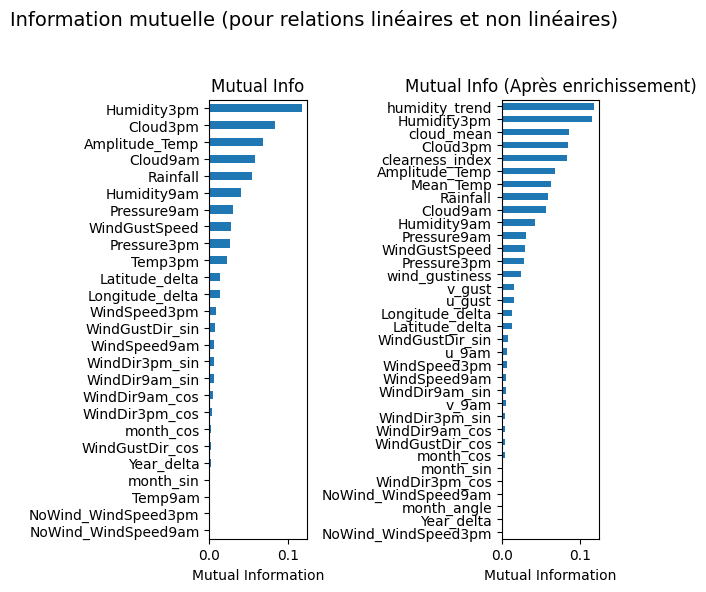

In [19]:
Feature_analysis_selection(best_model_enrichi, X_train, X_train_enrichi, X_test, X_test_enrichi, y_train, y_test) 

In [20]:
stop

NameError: name 'stop' is not defined

### rf

#### Recherche d'hyperparamètres et learning curve

Training score descend de ~0.72 à ~0.66
Validation score monte de ~0.64 à 0.64 
=> gap final : 0.02 : high biais>variance (sous apprentissage)
- Élargir max_depth pour laisser plus de croissance.
- Diminuer min_samples_leaf/split pour plus de flexibilité.

Training score descend de ~0.81 à ~0.79 => 
Validation score monte de ~0.65 à 0.673
=> gap final : 0.12 surapprentissage
- Leaf & split : augmenter pour diminuer la variance
- max_depth plus petit empêche l’apprentissage de détails trop fins.

avt 25min / 35 / 39

In [ ]:
models = {"clf_rf" : [RandomForestClassifier(),{
    "n_estimators": list(range(100, 201, 50)),   # + : + stabilité arbre mais + long    
    "max_depth": [8, 10, 12, 14],             
    "min_samples_split": [10, 50, 100],           
    "min_samples_leaf": [10, 15, 20, 30, 50],                 
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"],  
    "class_weight":["balanced_subsample", "balanced", None]}]}

results = []
estimators = []

for name, (model, params) in models.items():
    res, clf_best = compare_search_methods(name, model, params, X_train, X_test, y_train, y_test)
    results.append(res)
    estimators.append((name, clf_best))


Il y a beaucoup de variance et de l'overfitting

In [ ]:
stop

interpréter la learning curve (bcp de variance) ajuster les param selon défichage

In [ ]:
models = {"clf_rf" : [RandomForestClassifier(),{
    "n_estimators": list(range(150, 251, 50)),         
    "max_depth": list(range(8, 13, 2)),              
    "min_samples_split": [10, 15, 20 ,30],        
    "min_samples_leaf": [10, 15, 30, 50],       
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"],  
    "class_weight":["balanced_subsample", "balanced"]}]}

results = []
estimators = []

for name, (model, params) in models.items():
    res, clf_best = compare_search_methods(name, model, params, X_train, X_test, y_train, y_test)
    results.append(res)
    estimators.append((name, clf_best))

# Afficher les 3 meilleurs paramètres pour chaque model
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by='best_score', ascending=False)
print("\n=== TOP 3 Modèles ===")
display(df_sorted.head(3))


In [ ]:
print("Seuil optimisé sur dataset normal")
results = optimize_model(
    model_name='RandomForest',
    estimator=RandomForestClassifier(),
    param_grid={
    "n_estimators": list(range(100, 251, 50)),         
    "max_depth": list(range(8, 15, 2)),              # 8, 10, 12, 14
    "min_samples_split": [10, 15, 20 ,30, 50],       #[6, 8, 10, 12] 
    "min_samples_leaf": [10, 15, ,30, 50, 75],       #[5, 10, 15, 20]
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"],  
    "class_weight":["balanced_subsample", "balanced"]},
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)
best_model_normal = results['best_model']

#### et sur data enrichi

In [ ]:
stop

### XGB

##### Normal


=== clf_xgb ===
Best parameters: OrderedDict({'colsample_bytree': 0.6722711420727535, 'gamma': 1, 'learning_rate': 0.3, 'max_depth': 11, 'min_child_weight': 12, 'n_estimators': 100, 'reg_alpha': 5.000000000000001, 'reg_lambda': 49.99999999999999, 'scale_pos_weight': 3.46, 'subsample': 0.8})
Test accuracy: 0.842

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     20231
           1       0.62      0.77      0.69      5852

    accuracy                           0.84     26083
   macro avg       0.77      0.82      0.79     26083
weighted avg       0.86      0.84      0.85     26083


Imbalanced report:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.86      0.77      0.89      0.82      0.67     20231
          1       0.62      0.77      0.86      0.69      0.82      0.66      5852

avg / total       0.86      0.84      0.79      0.85      0.82  

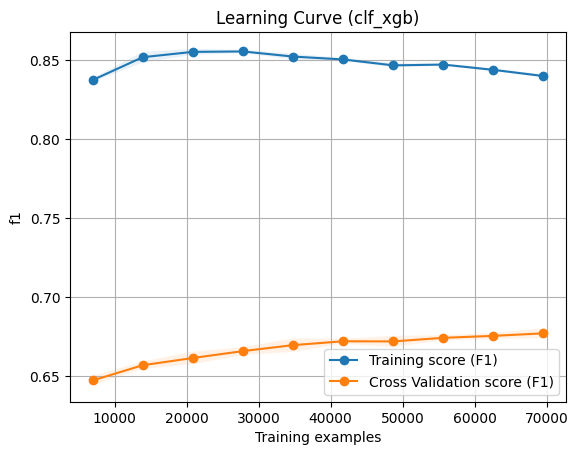


Top 3 parameter sets (with mean test scores):
  Rank 1: params = OrderedDict({'colsample_bytree': 0.6722711420727535, 'gamma': 1, 'learning_rate': 0.3, 'max_depth': 11, 'min_child_weight': 12, 'n_estimators': 100, 'reg_alpha': 5.000000000000001, 'reg_lambda': 49.99999999999999, 'scale_pos_weight': 3.46, 'subsample': 0.8}), mean_test_score = 0.677
  Rank 2: params = OrderedDict({'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'max_depth': 11, 'min_child_weight': 12, 'n_estimators': 100, 'reg_alpha': 5.000000000000001, 'reg_lambda': 49.99999999999999, 'scale_pos_weight': 3.46, 'subsample': 0.8}), mean_test_score = 0.676
  Rank 3: params = OrderedDict({'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.3, 'max_depth': 11, 'min_child_weight': 12, 'n_estimators': 300, 'reg_alpha': 5.000000000000001, 'reg_lambda': 40.4951046216961, 'scale_pos_weight': 3.46, 'subsample': 0.607620623917942}), mean_test_score = 0.675


In [21]:
#Learning curve et défrichage des paramètres
from skopt.space import Integer, Real # on ne peut pas utiliser les distributions de scipy.stats (uniform, loguniform, randint) avec BayesSearchCV

param_space = {    
    # nombre d’arbres
    'n_estimators': list(range(100, 500, 100)), # ou 'n_estimators': stats.randint(150, 1000)?
    # profondeur maximale, 
    'max_depth': list(range(6, 13)),
    # poids minimal d’une feuille, 
    'min_child_weight': list(range(6, 13, 2)),
    # gamma (seuil de gain pour un split) #essayer avec un pas de 0.5?
    'gamma': list(range(1, 5, 1)),
    # sous-échantillonnage des instances, distribution uniforme entre 0.5 et 0.8   
    'subsample': Real(0.5, 0.8, prior='uniform'),
    # sous-échantillonnage des features,
    'colsample_bytree': Real(0.5, 0.8, prior='uniform'),
    # learning rate — petite grille de valeurs clés,
    'learning_rate': Real(0.3, 5, prior='log-uniform'),
    # régularisation L2
    'reg_lambda': Real(2, 50, prior='log-uniform'), 
    # régularisation L1
    'reg_alpha': Real(5, 50, prior='log-uniform'),
    # use_label_encoder : sert à quoi?
    # 'use_label_encoder':False,
    # scale_pos_weight sert à quoi?
    'scale_pos_weight': [round(y_train.value_counts()[0]/y_train.value_counts()[1], 2)]}

models = {"clf_xgb" : [xgb.XGBClassifier(objective='binary:logistic',
                                         use_label_encoder=False,
                                        eval_metric='aucpr',      # ou 'logloss'
                                        random_state=42,
                                        n_jobs=-1,
                                        early_stopping_rounds=40),
                                    param_space]}

# Préparation d'un EarlyStopping pour XGB qui utilisera 10% de X_train: 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)
fit_kwargs = {'eval_set': [(X_tr, y_tr), (X_val, y_val)], 'verbose': False}

results = []
estimators = []

for name, (model, params) in models.items():
    res, clf_best = compare_search_methods(name, model, params, X_train, X_test, y_train, y_test, cv_splits=3, fit_kwargs=fit_kwargs)
    results.append(res)
    estimators.append((name, clf_best))


Nombre optimal d'arbres (best_iteration): 99


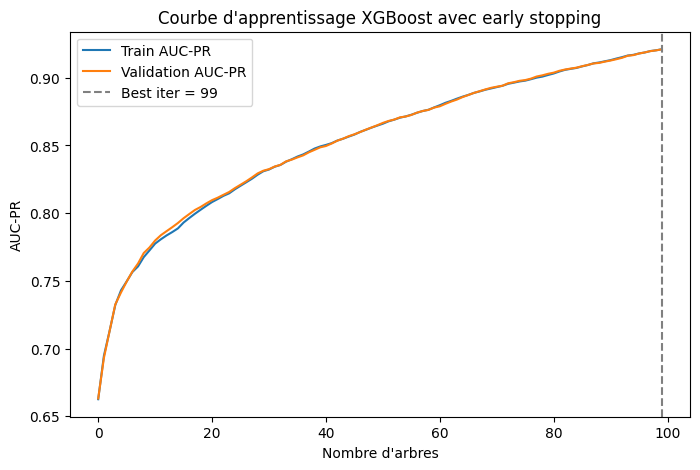

In [22]:
import matplotlib.pyplot as plt

# Supposons que clf_best est votre meilleur estimateur issu de BayesSearchCV
# et qu'il a bien été entraîné avec fit_kwargs={'eval_set': [...], 'verbose': False}

# 1. Récupération du nombre optimal d'arbres
best_iter = clf_best.get_booster().best_iteration
print(f"Nombre optimal d'arbres (best_iteration): {best_iter}")

# 2. Récupération de l'historique d'évaluation
evals_result = clf_best.evals_result()

# Par défaut XGBoost stocke deux entrées dans evals_result :
# 'validation_0' (sur X_tr, y_tr) et 'validation_1' (sur X_val, y_val)
# Pour l'eval_metric 'aucpr', par exemple :
train_scores = evals_result['validation_0']['aucpr']
val_scores   = evals_result['validation_1']['aucpr']

# 3. Visualisation de la courbe d'apprentissage en fonction du n_trees
plt.figure(figsize=(8, 5))
plt.plot(train_scores, label='Train AUC-PR')
plt.plot(val_scores,   label='Validation AUC-PR')
plt.axvline(best_iter, color='gray', linestyle='--', label=f'Best iter = {best_iter}')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('AUC-PR')
plt.title('Courbe d\'apprentissage XGBoost avec early stopping')
plt.legend()
plt.show()


Seuil optimisé sur dataset normal
Optimisation : XGBClassifier
Modèle + seuil sauvegardés dans : models/XGBClassifier_X_train_model_and_threshold.joblib

XGBClassifier | F1: 0.682 | Acc: 0.849 | Seuil: 0.31
Meilleurs hyperparamètres: OrderedDict({'max_depth': 8})
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90     20231
           1       0.65      0.72      0.68      5852

    accuracy                           0.85     26083
   macro avg       0.78      0.80      0.79     26083
weighted avg       0.86      0.85      0.85     26083

Rapport déséquilibre:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.89      0.72      0.90      0.80      0.65     20231
          1       0.65      0.72      0.89      0.68      0.80      0.63      5852

avg / total       0.86      0.85      0.76      0.85      0.80      0.65     26083



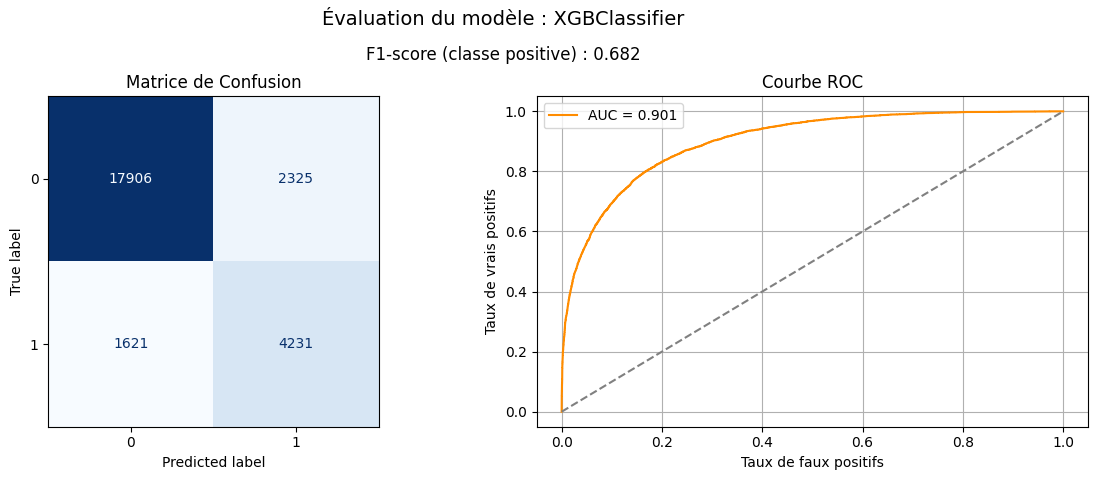

In [23]:
print("Seuil optimisé sur dataset normal")
results = optimize_model(
    model_name='XGBClassifier',
    estimator=xgb.XGBClassifier(),
    param_grid={'max_depth': list(range(6, 13))},
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    nom_type_dataset = "X_train",
    cv_splits=5,
    bayes_iter = 5
)
best_model_enrichi = results['best_model']

In [24]:
stop

NameError: name 'stop' is not defined

##### Enrichi

In [ ]:
from xgboost import XGBClassifier

from tqdm import tqdm

# Fonction d'entraînement et d'évaluation du modèle XGBoost
def eval_xgb(X_train, y_train, X_test, y_test, seuil=0.5):
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_estimators=300,
        max_depth=10,
        learning_rate=0.05,
        subsample=0.8,
        scale_pos_weight=1,
        reg_lambda=2,
        reg_alpha=0.5,
        gamma=0.2,
        colsample_bytree=1.0
    )
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= seuil).astype(int)
    return f1_score(y_test, y_pred), roc_auc_score(y_test, y_proba)

# Entraînement initial sur toutes les variables réduites
model_full = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=300,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    scale_pos_weight=1,
    reg_lambda=2,
    reg_alpha=0.5,
    gamma=0.2,
    colsample_bytree=1.0
)

model_full.fit(X_train, y_train)

# Importance des variables
feat_importances = pd.Series(model_full.feature_importances_, index=X_train.columns)
feat_sorted = feat_importances.sort_values()

# Test itératif : on retire les variables les moins utiles une par une
f1_scores = []
roc_aucs = []
nb_features = []

for i in tqdm(range(len(feat_sorted))):
    selected_feats = feat_sorted.iloc[i:].index.tolist()
    X_train_temp = X_train[selected_feats]
    X_test_temp = X_test[selected_feats]

    f1, auc = eval_xgb(X_train_temp, y_train, X_test_temp, y_test)

    f1_scores.append(f1)
    roc_aucs.append(auc)
    nb_features.append(len(selected_feats))

# Compilation des résultats
results = pd.DataFrame({
    'Nombre de variables': nb_features,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

# Courbes de performance
plt.figure(figsize=(12, 6))
plt.plot(results['Nombre de variables'], results['F1 Score'], label='F1 Score', marker='o')
plt.plot(results['Nombre de variables'], results['ROC AUC'], label='ROC AUC', marker='x')
plt.xlabel("Nombre de variables utilisées")
plt.ylabel("Score")
plt.title("Impact du nombre de variables sur les performances (XGBoost)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des meilleures combinaisons
print("\nTop 20 dernières combinaisons testées :")
print(results.tail(20).to_string(index=False))



In [ ]:
## Pb il y a des variables continues. Peut être voir pour régression basé sur Rainfall?

En vrac : truc utiles

In [ ]:
#Dico de couleur "logique" de vent
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgb

# Dictionnaire avec les couleurs en format HEX
direction_color_map_hex = {
    'N': '#ff0000',
    'NNE': '#ff6600',
    'NE': '#ffcc00',
    'ENE': '#ffff00',
    'E': '#ccff00',
    'ESE': '#66ff00',
    'SE': '#00ff00',
    'SSE': '#00ff66',
    'S': '#00ffcc',
    'SSW': '#00ccff',
    'SW': '#0066ff',
    'WSW': '#0000ff',
    'W': '#6600ff',
    'WNW': '#cc00ff',
    'NW': '#ff00ff',
    'NNW': '#ff0066',
    np.nan: '#000000'  # Black for NaN
}

# Conversion des couleurs HEX en RGB
direction_color_map_rgb = {key: to_rgb(value) for key, value in direction_color_map_hex.items()}

# Création d'une figure et d'un axe
fig, ax = plt.subplots(figsize=(10, 2))

# Affichage des couleurs sous forme de barre horizontale
ax.imshow([list(direction_color_map_rgb.values())], aspect='auto')

# Configuration de l'axe des x avec les directions de vent
ax.set_xticks(np.arange(len(direction_color_map_rgb)))
ax.set_xticklabels(list(direction_color_map_rgb.keys()), rotation=45, ha="right")

# Supprimer les ticks de l'axe des y
ax.get_yaxis().set_visible(False)

# Ajouter un titre
ax.set_title('Couleurs associées aux directions du vent')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
direction_color_map_rgb.keys()